# Exploratory Data Analysis

---
### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

We will explore the dataset to identify which variables are relevant in predicting `price` of a game.

In [2]:
data = pd.read_csv('cleaned.csv')
data

,Unnamed: 0,name,achievements,average_playtime,median_playtime,owners,price,detailed_description,platforms_windows,platforms_mac,...,genres_Software Training,genres_Sexual Content,genres_Audio Production,genres_Game Development,genres_Photo Editing,genres_Accounting,genres_Documentary,genres_Tutorial,age,positive_ratio
0,0,Counter-Strike,0,17612,317,15000000,7.19,Play the world's number 1 online action game. ...,1,1,...,0,0,0,0,0,0,0,0,7000,0.973888
1,1,Team Fortress Classic,0,277,62,7500000,3.99,One of the most popular online action games of...,1,1,...,0,0,0,0,0,0,0,0,7580,0.839787
2,2,Day of Defeat,0,187,34,7500000,3.99,Enlist in an intense brand of Axis vs. Allied ...,1,1,...,0,0,0,0,0,0,0,0,6089,0.895648
3,3,Deathmatch Classic,0,258,184,7500000,3.99,Enjoy fast-paced multiplayer gaming with Death...,1,1,...,0,0,0,0,0,0,0,0,6788,0.826623
4,4,Half-Life: Opposing Force,0,624,415,7500000,3.99,Return to the Black Mesa Research Facility as ...,1,1,...,0,0,0,0,0,0,0,0,7366,0.947996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15035,27027,Border Officer,12,0,0,10000,7.19,Usually everyone is unemployed here. But by ch...,1,0,...,0,0,0,0,0,0,0,0,260,0.714286
15036,27030,Geometry May. I swear it's a nice free game,7,0,0,10000,0.00,"Hi, guys, it's me again. Check out my new game...",1,0,...,0,0,0,0,0,0,0,0,260,0.846939
15037,27034,Sin Slayers: The First Sin,0,0,0,35000,0.00,Sin Slayers: The First Sin is a free demo of S...,1,0,...,0,0,0,0,0,0,0,0,265,0.776923
15038,27039,A Legionary's Life,23,0,0,10000,6.10,This is a unique single-player game with RPG e...,1,0,...,0,0,0,0,0,0,0,0,257,0.733333


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15040 entries, 0 to 15039
Data columns (total 71 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             15040 non-null  int64  
 1   name                                   15040 non-null  object 
 2   achievements                           15040 non-null  int64  
 3   average_playtime                       15040 non-null  int64  
 4   median_playtime                        15040 non-null  int64  
 5   owners                                 15040 non-null  int64  
 6   price                                  15040 non-null  float64
 7   detailed_description                   15040 non-null  object 
 8   platforms_windows                      15040 non-null  int64  
 9   platforms_mac                          15040 non-null  int64  
 10  platforms_linux                        15040 non-null  int64  
 11  ca

There are 71 variables and 15040 entries. All the entries are non-null.

In [4]:
for col in data:
    print(col, ":", data[col].nunique())

Unnamed: 0 : 15040
name : 15029
achievements : 357
average_playtime : 1324
median_playtime : 1289
owners : 13
price : 220
detailed_description : 14998
platforms_windows : 2
platforms_mac : 2
platforms_linux : 2
categories_Multi-player : 2
categories_Online Multi-Player : 2
categories_Local Multi-Player : 2
categories_Valve Anti-Cheat enabled : 2
categories_Single-player : 2
categories_Steam Cloud : 2
categories_Steam Achievements : 2
categories_Steam Trading Cards : 2
categories_Captions available : 2
categories_Partial Controller Support : 2
categories_Includes Source SDK : 2
categories_Cross-Platform Multiplayer : 2
categories_Stats : 2
categories_Commentary available : 2
categories_Includes level editor : 2
categories_Steam Workshop : 2
categories_In-App Purchases : 2
categories_Co-op : 2
categories_Full controller support : 2
categories_Steam Leaderboards : 2
categories_SteamVR Collectibles : 2
categories_Online Co-op : 2
categories_Shared/Split Screen : 2
categories_Local Co-op : 

Description of the dataset:  
> **name**: Title of the game  
> **achievements**: Number of in-game achievements  
> **average_playtime**: Average user playtime  
> **median_playtime**: Median user playtime  
> **owners**: Estimated number of owners  
> **price**: Price of the game in GBP  
> **detailed_description**: Description about the game  
> **platforms_windows**: Whether the game is available on Windows  
> **platforms_mac**: Whether the game is available on Mac  
> **platforms_linux**: Whether the game is avaible on Linux  
> **categories_[category]**: Whether the game is of the category  
> **genres_[genre]**: Whether the game is of the genre  
> **age**: Number of days since release date until 2020 Jan 1  
> **positive_ratio**: Ratio of positive ratings to total ratings

The first column (ID No.) and `name` are unique for each entry, so they are not relevant variables. For now, we shall disregard the `detailed_description` of the game. We will analyse the text of the description later. Drop them from the DataFrame.

In [5]:
data = data.drop([data.columns[0], 'name', 'detailed_description'], axis = 1)
data.head()

,achievements,average_playtime,median_playtime,owners,price,platforms_windows,platforms_mac,platforms_linux,categories_Multi-player,categories_Online Multi-Player,...,genres_Software Training,genres_Sexual Content,genres_Audio Production,genres_Game Development,genres_Photo Editing,genres_Accounting,genres_Documentary,genres_Tutorial,age,positive_ratio
0,0,17612,317,15000000,7.19,1,1,1,1,1,...,0,0,0,0,0,0,0,0,7000,0.973888
1,0,277,62,7500000,3.99,1,1,1,1,1,...,0,0,0,0,0,0,0,0,7580,0.839787
2,0,187,34,7500000,3.99,1,1,1,1,0,...,0,0,0,0,0,0,0,0,6089,0.895648
3,0,258,184,7500000,3.99,1,1,1,1,1,...,0,0,0,0,0,0,0,0,6788,0.826623
4,0,624,415,7500000,3.99,1,1,1,1,0,...,0,0,0,0,0,0,0,0,7366,0.947996


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15040 entries, 0 to 15039
Data columns (total 68 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   achievements                           15040 non-null  int64  
 1   average_playtime                       15040 non-null  int64  
 2   median_playtime                        15040 non-null  int64  
 3   owners                                 15040 non-null  int64  
 4   price                                  15040 non-null  float64
 5   platforms_windows                      15040 non-null  int64  
 6   platforms_mac                          15040 non-null  int64  
 7   platforms_linux                        15040 non-null  int64  
 8   categories_Multi-player                15040 non-null  int64  
 9   categories_Online Multi-Player         15040 non-null  int64  
 10  categories_Local Multi-Player          15040 non-null  int64  
 11  ca

**Numeric Variables** : `achievements`, `average_playtime`, `median_playtime`, `owners`, `price`, `age`, `positive_ratio`  
**Categorical Variables** : `platforms_windows`, `platforms_max`, `platforms_linux`, `categories_[category]`, `genres_[genre]`

---

## 1. Analysis of Numeric Variables  
Extract the numeric variables from the dataset.

In [7]:
dataNum = pd.DataFrame(data[['achievements', 'average_playtime', 'median_playtime', 'owners', 'price', 'age', 'positive_ratio']])
dataNum

,achievements,average_playtime,median_playtime,owners,price,age,positive_ratio
0,0,17612,317,15000000,7.19,7000,0.973888
1,0,277,62,7500000,3.99,7580,0.839787
2,0,187,34,7500000,3.99,6089,0.895648
3,0,258,184,7500000,3.99,6788,0.826623
4,0,624,415,7500000,3.99,7366,0.947996
...,...,...,...,...,...,...,...
15035,12,0,0,10000,7.19,260,0.714286
15036,7,0,0,10000,0.00,260,0.846939
15037,0,0,0,35000,0.00,265,0.776923
15038,23,0,0,10000,6.10,257,0.733333


There are 7 numeric variables.

---

### Uni-Variate Analysis

First, we perform uni-variate analysis on each of the numeric variables.  
Visualize the uni-variate distributions of each of the variables independently.

In [8]:
dataNum.describe()

,achievements,average_playtime,median_playtime,owners,price,age,positive_ratio
count,15040.000000,15040.000000,15040.000000,1.504000e+04,15040.000000,15040.000000,15040.000000
mean,58.929255,258.967952,250.955386,2.282473e+05,7.134501,1356.631915,0.734720
std,404.266129,2417.094048,3097.676257,1.773139e+06,7.959682,872.222162,0.180515
min,0.000000,0.000000,0.000000,1.000000e+04,0.000000,245.000000,0.011765
25%,0.000000,0.000000,0.000000,1.000000e+04,1.690000,749.000000,0.629255
50%,12.000000,0.000000,0.000000,3.500000e+04,4.990000,1176.000000,0.772727
75%,30.000000,145.000000,149.000000,7.500000e+04,9.990000,1706.000000,0.877551
max,9821.000000,190625.000000,190625.000000,1.500000e+08,154.990000,8220.000000,1.000000


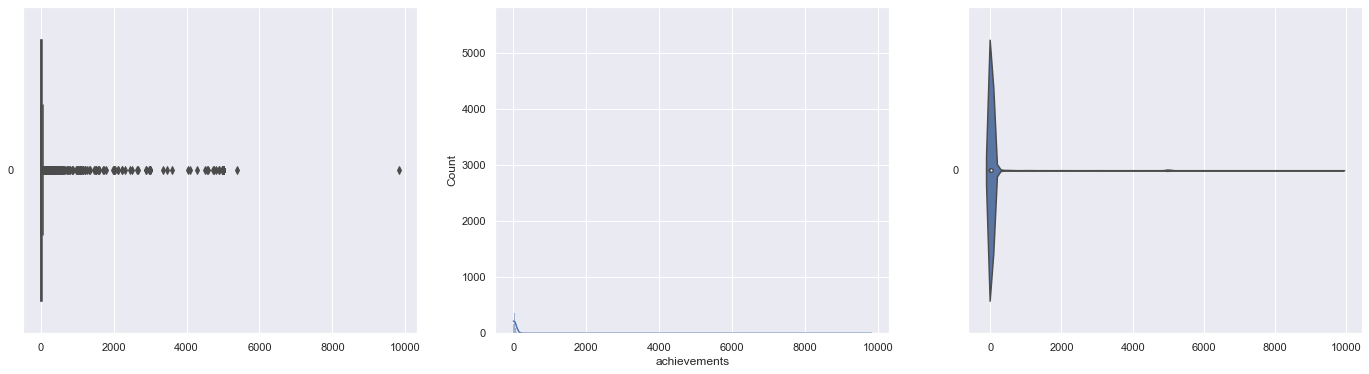

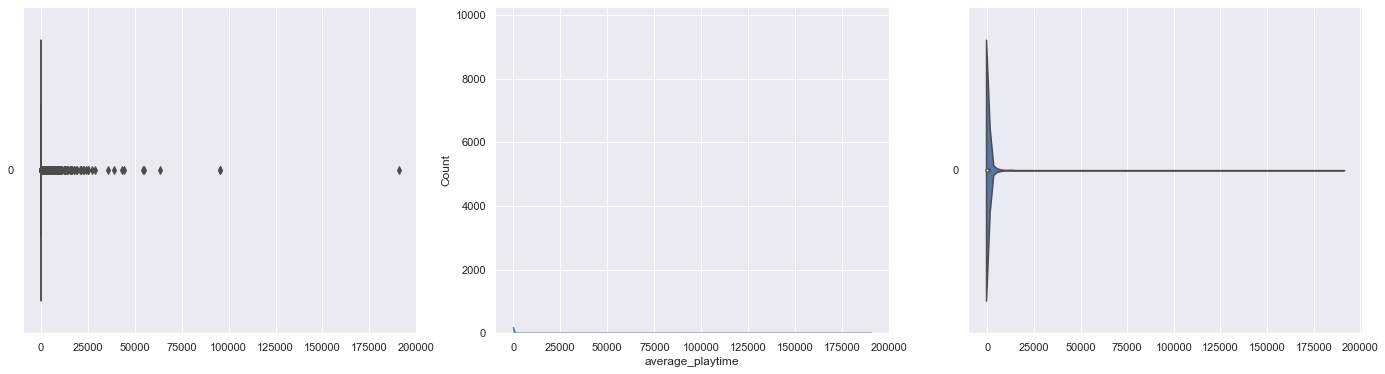

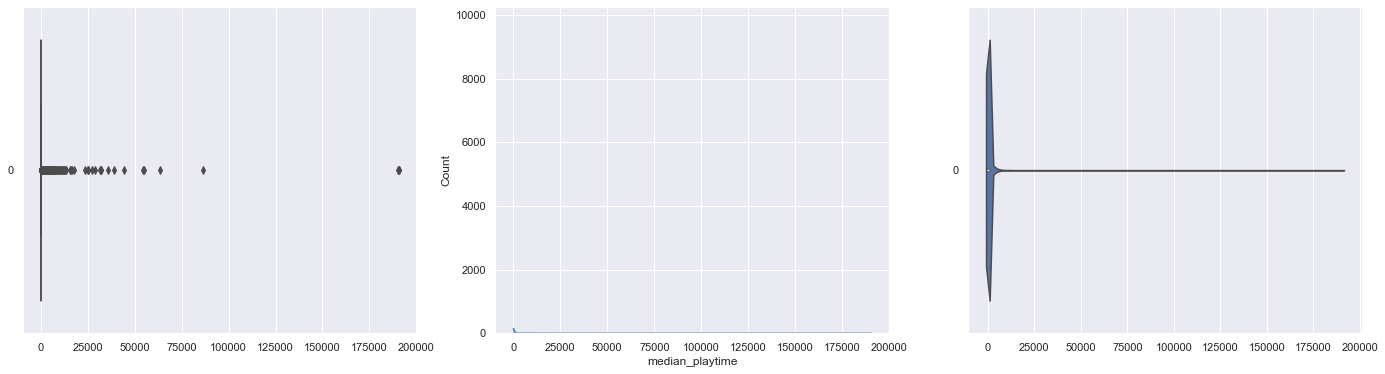

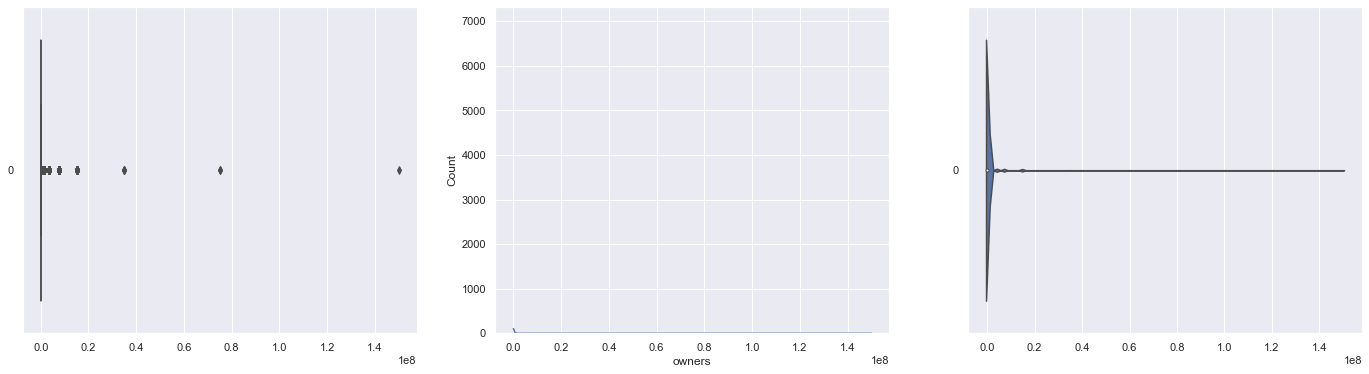

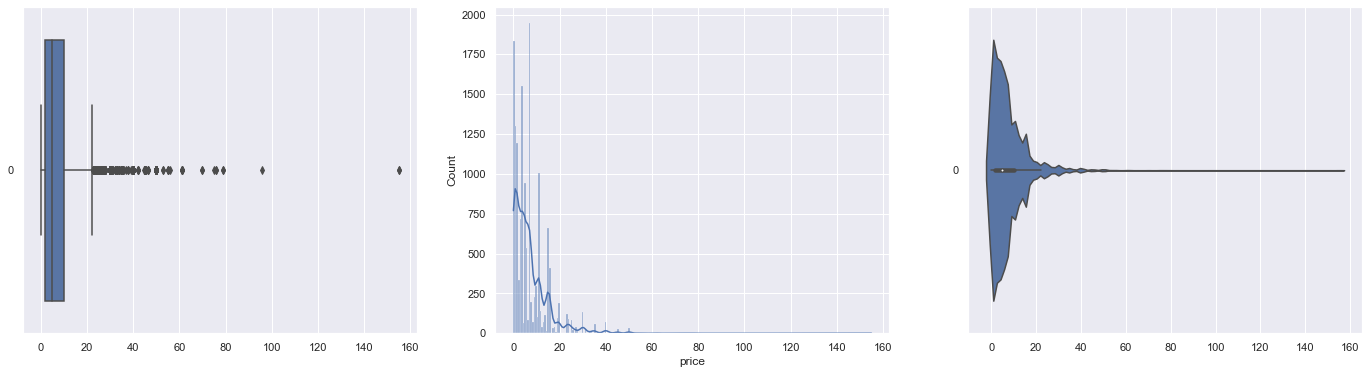

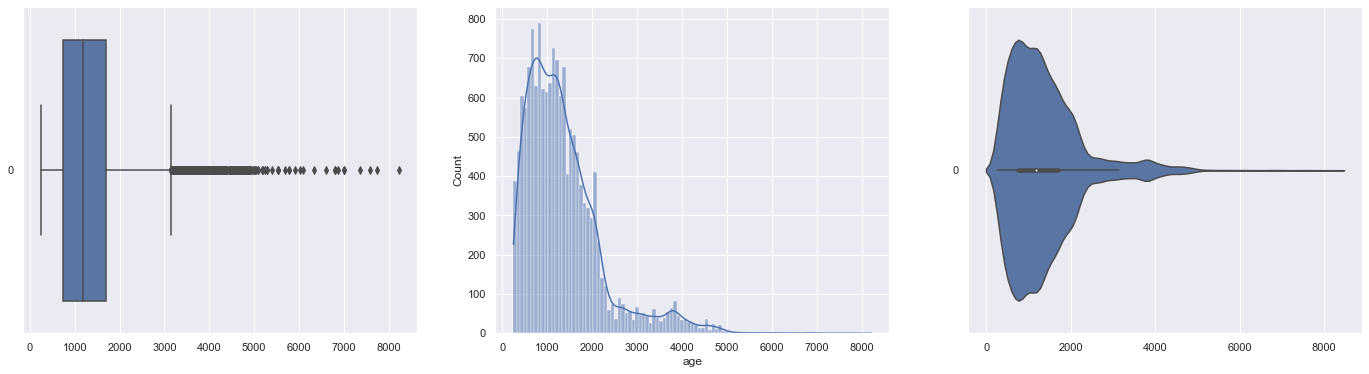

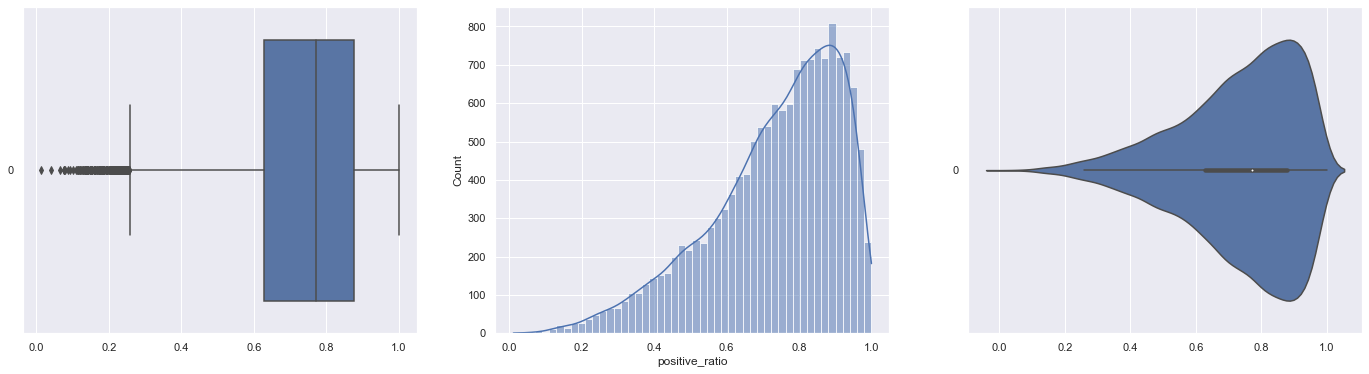

In [9]:
for var in dataNum:
    # Set up matplotlib figure with three subplots
    f, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Plot the basic uni-variate figures for each variable
    sb.boxplot(data = dataNum[var], orient = "h", ax = axes[0])
    sb.histplot(data = dataNum[var], kde = True, ax = axes[1])
    sb.violinplot(data = dataNum[var], orient = "h", ax = axes[2])

In [10]:
dataNum.skew()

achievements        11.773344
average_playtime    45.757867
median_playtime     49.921036
owners              52.653771
price                3.156798
age                  1.721937
positive_ratio      -0.867726
dtype: float64

Some of the data is skewed. We shall find the number of outliers and remove them.

In [11]:
# Calculate the quartiles
Q1 = dataNum.quantile(0.25)
Q3 = dataNum.quantile(0.75)
IQR = Q3 - Q1

# Rule to identify outliers
rule = ((dataNum < (Q1 - (1.5 * IQR))) | (dataNum > (Q3 + (1.5 * IQR))))

# Count the number of outliers
rule.sum()

achievements         820
average_playtime    1484
median_playtime     1471
owners              2288
price                788
age                  832
positive_ratio       221
dtype: int64

In [12]:
def remove_outliers(data):
    data_removeoutliers = data[(data >= Q1 - (1.5 * IQR)) & (data <= Q3 + (1.5 * IQR))]
    return data_removeoutliers

In [13]:
dataNum_outliersremoved = remove_outliers(dataNum)
dataNum_outliersremoved

,achievements,average_playtime,median_playtime,owners,price,age,positive_ratio
0,0.0,NaN,317.0,NaN,7.19,NaN,0.973888
1,0.0,277.0,62.0,NaN,3.99,NaN,0.839787
2,0.0,187.0,34.0,NaN,3.99,NaN,0.895648
3,0.0,258.0,184.0,NaN,3.99,NaN,0.826623
4,0.0,NaN,NaN,NaN,3.99,NaN,0.947996
...,...,...,...,...,...,...,...
15035,12.0,0.0,0.0,10000.0,7.19,260.0,0.714286
15036,7.0,0.0,0.0,10000.0,0.00,260.0,0.846939
15037,0.0,0.0,0.0,35000.0,0.00,265.0,0.776923
15038,23.0,0.0,0.0,10000.0,6.10,257.0,0.733333


In [14]:
dataNum_outliersremoved.skew()

achievements        1.091386
average_playtime    1.774143
median_playtime     1.767206
owners              1.644077
price               0.863089
age                 0.663382
positive_ratio     -0.718343
dtype: float64

With the outliers removed, skew has decreased.  
Use the data with outliers removed to visualize the uni-variate distributions of each variable again.

In [15]:
dataNum_outliersremoved.describe()

,achievements,average_playtime,median_playtime,owners,price,age,positive_ratio
count,14220.000000,13556.000000,13569.000000,12752.000000,14252.000000,14208.000000,14819.000000
mean,15.826020,48.824948,50.555457,38597.082811,5.783908,1204.961571,0.742752
std,17.924527,93.788744,97.023830,43937.229139,4.998357,604.883141,0.169251
min,0.000000,0.000000,0.000000,10000.000000,0.000000,245.000000,0.257143
25%,0.000000,0.000000,0.000000,10000.000000,1.690000,720.000000,0.637931
50%,11.000000,0.000000,0.000000,10000.000000,4.790000,1135.000000,0.776286
75%,26.000000,32.000000,34.000000,35000.000000,7.990000,1598.000000,0.878877
max,75.000000,362.000000,372.000000,150000.000000,21.990000,3137.000000,1.000000


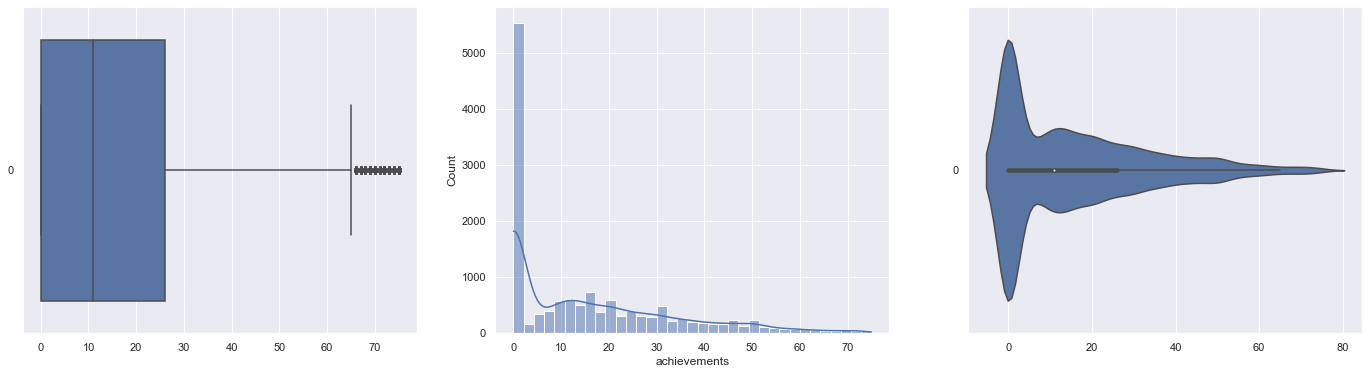

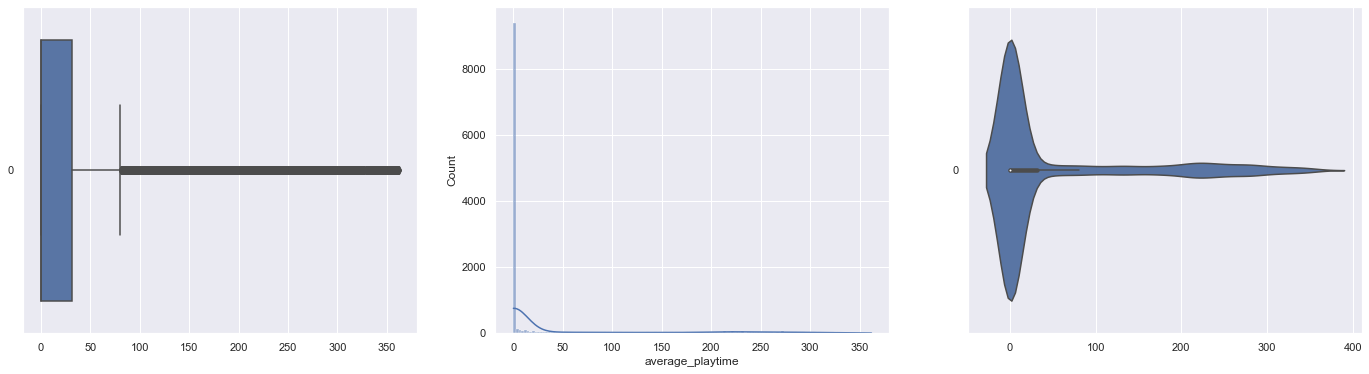

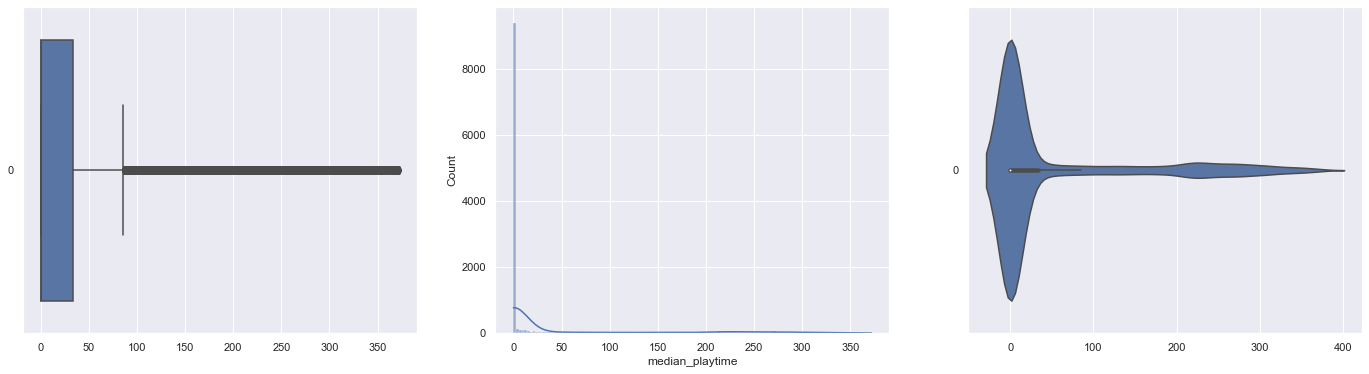

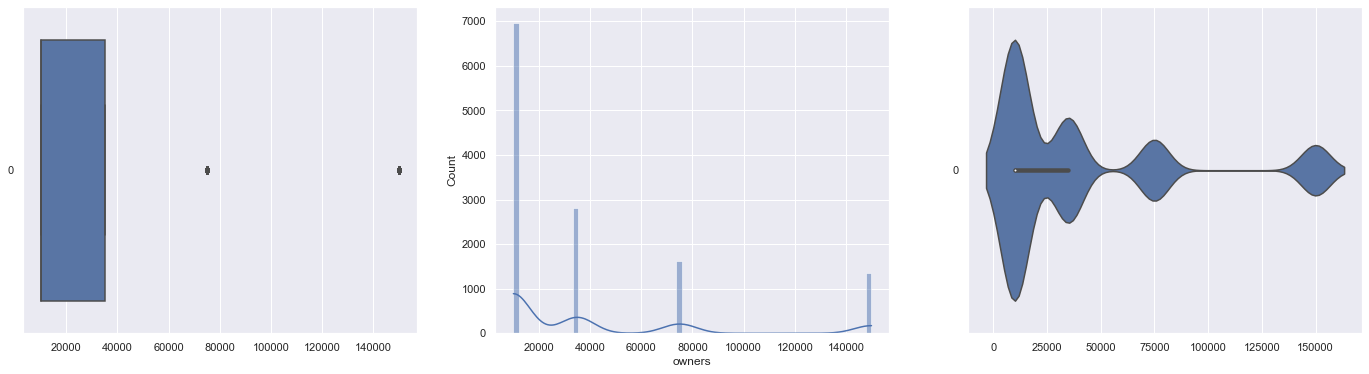

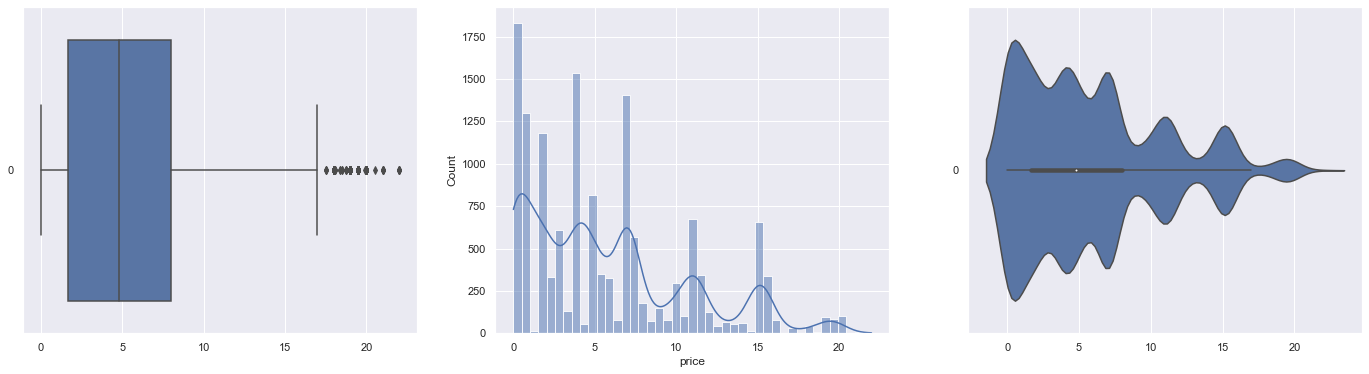

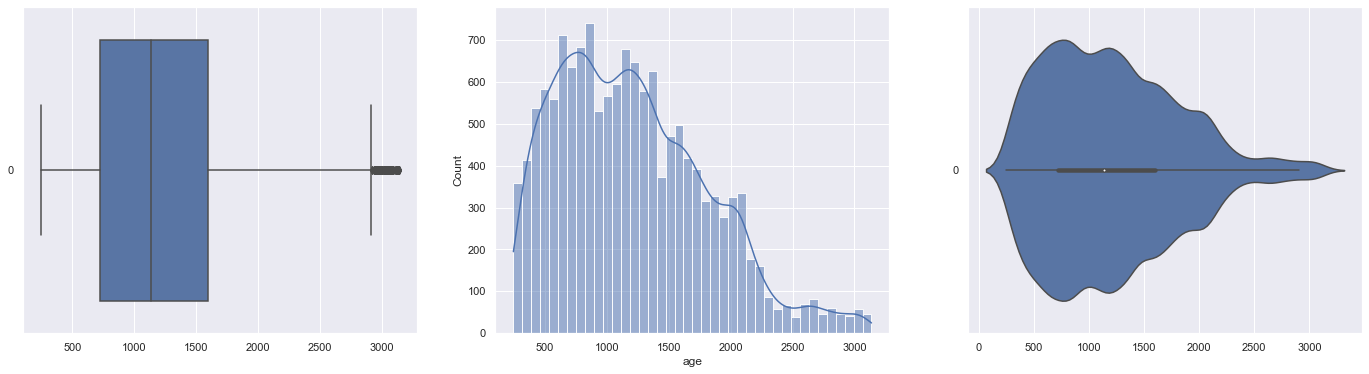

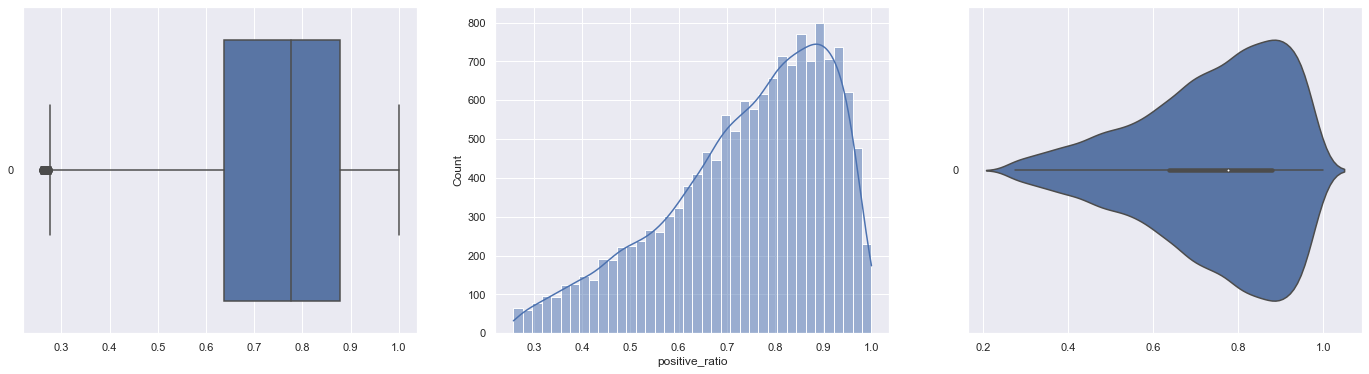

In [16]:
for var in dataNum_outliersremoved:
    # Set up matplotlib figure with three subplots
    f, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Plot the basic uni-variate figures for each variable
    sb.boxplot(data = dataNum_outliersremoved[var], orient = "h", ax = axes[0])
    sb.histplot(data = dataNum_outliersremoved[var], kde = True, ax = axes[1])
    sb.violinplot(data = dataNum_outliersremoved[var], orient = "h", ax = axes[2])

- Most games do not have any achievements. The median number of achievements is 11 and the mean is 16.
- The mean playtime is 50 hours. Most games have 0 hours of playtime, which might be due to short games that have less than 1 hour of gameplay or missing data.
- The median number of owners of a game is 10000. The mean is higher at about 40000, as there is a smaller number of highly popular games have many more owners, which contributes to a higher average.
- The median price of a game is 4.79 pounds and the mean is 5.78 pounds. Low prices make sense as customers will generally be more willing to buy cheaper games. The large number of free games also contributes to a lower average.
- The age of a game is positively skewed, which indicates there more games are released recently compared to in the past.
- The median positive ratio is 0.776 and the mean is 0.743, and positive ratio is negatively skewed, which means most games are generally positively rated.

We can get a better look at the distribution of playtime if we remove the entries with 0 hours. However, as the median playtime is 0 hours, this will remove at least 50% of the data, so it is only for zooming in on the general trend for games with notable playtime.

In [17]:
data_playtime = pd.DataFrame(dataNum_outliersremoved[['average_playtime', 'median_playtime']])
data_playtime = data_playtime[(data_playtime != 0).all(1)]
data_playtime.head()

,average_playtime,median_playtime
0,NaN,317.0
1,277.0,62.0
2,187.0,34.0
3,258.0,184.0
4,NaN,NaN


In [18]:
data_playtime.describe()

,average_playtime,median_playtime
count,4339.000000,4352.000000
mean,152.539986,157.625689
std,107.989139,111.687972
min,1.000000,1.000000
25%,43.500000,44.000000
50%,158.000000,165.000000
75%,243.000000,252.000000
max,362.000000,372.000000


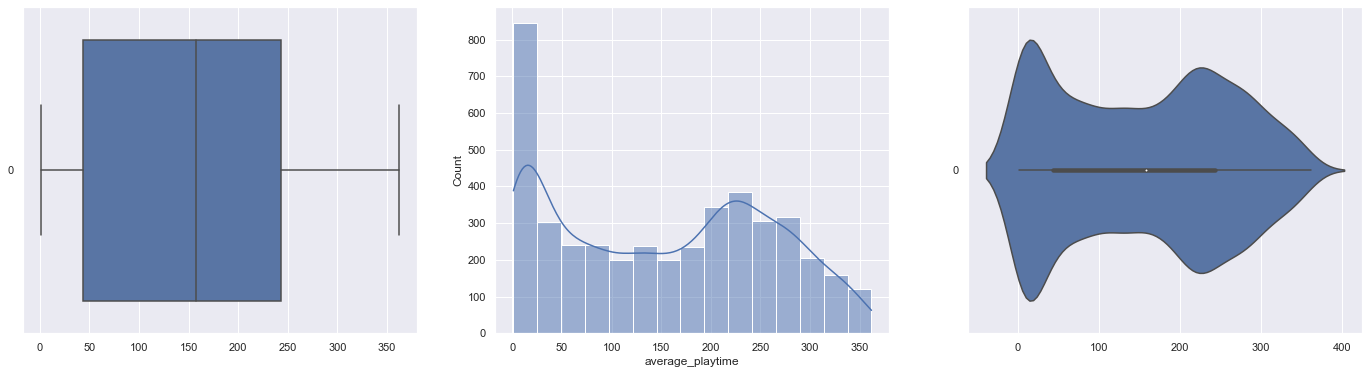

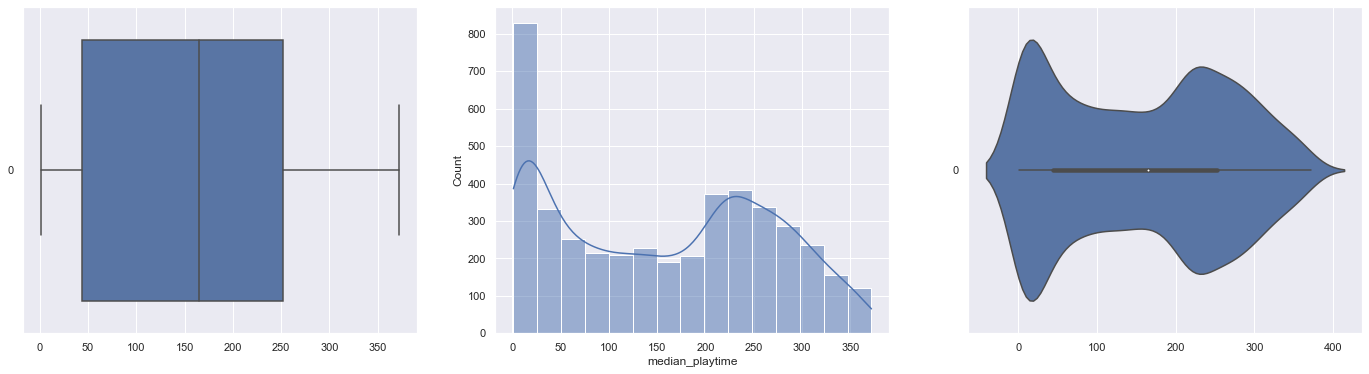

In [19]:
for var in data_playtime:
    # Set up matplotlib figure with three subplots
    f, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Plot the basic uni-variate figures for each variable
    sb.boxplot(data = data_playtime[var], orient = "h", ax = axes[0])
    sb.histplot(data = data_playtime[var], kde = True, ax = axes[1])
    sb.violinplot(data = data_playtime[var], orient = "h", ax = axes[2])

Of the games that have at least 1 hour of playtime, the distribution is bimodal. This variation in playtime shows that the games can be generally grouped into 2 groups of shorter games and longer games.

---

### Bi-Variate Analysis

Next, we perform bi-variate anaylsis of `price` against the each of the other variables.  
`price` is the dependent variable and the other variables are the independent variables.

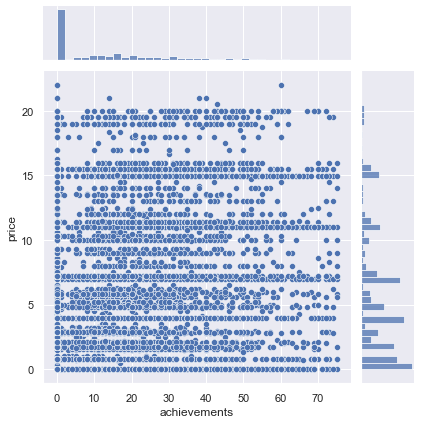

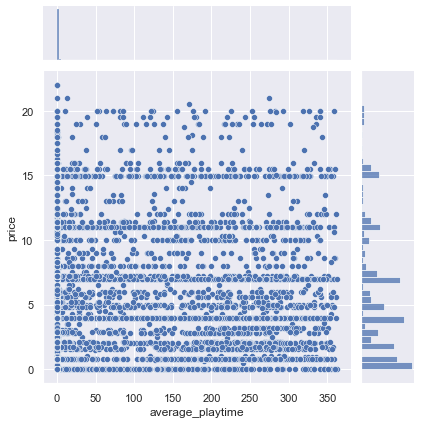

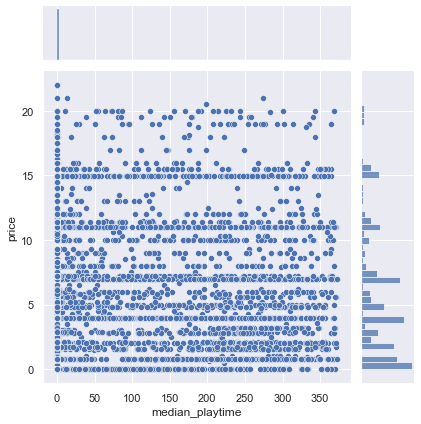

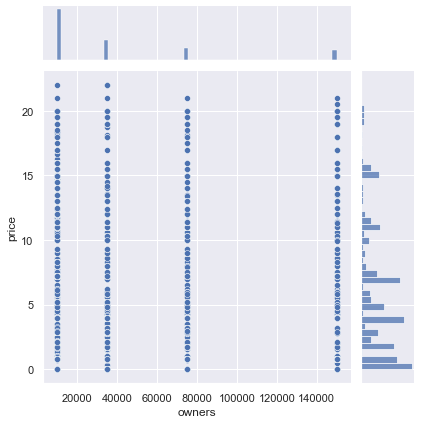

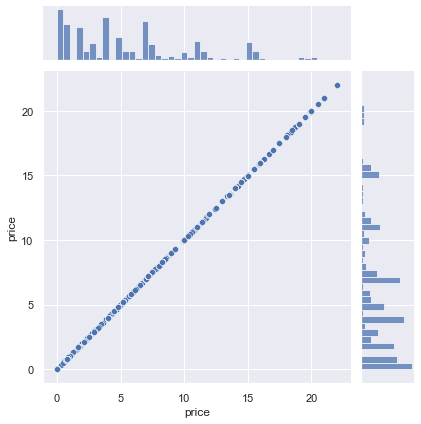

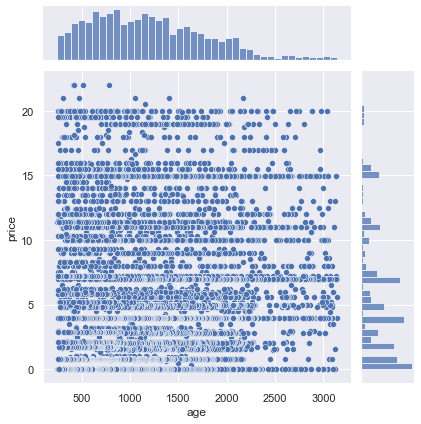

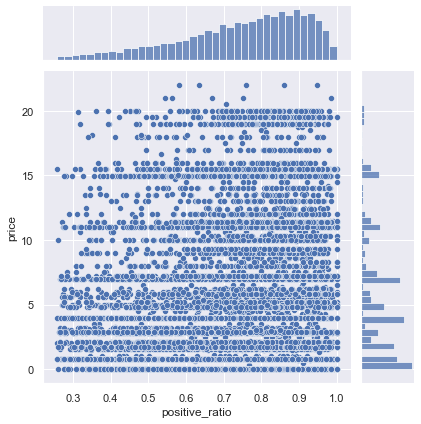

In [20]:
for var in dataNum_outliersremoved:
    # Draw jointplot of price against each of the other variables
    sb.jointplot(data = dataNum_outliersremoved, x = var, y = "price", height = 6)

In [21]:
# Calculate the correlation
dataNum_outliersremoved.corr()["price"]

achievements        0.252409
average_playtime   -0.018023
median_playtime    -0.018678
owners             -0.028784
price               1.000000
age                 0.059894
positive_ratio      0.168849
Name: price, dtype: float64

Unfortunately, `achievements`, `average_playtime`, `median_playtime`, `owners`, `age` and `positive_ratio` all have weak correlation with `price`, so they may not be good predictors.

---

## 2. Analysis of Categorical Variables  
Extract the categorical variables from the dataset.

In [22]:
dataCat = data.drop(['achievements', 'average_playtime', 'median_playtime', 'owners', 'price', 'age', 'positive_ratio'], axis = 1)
dataCat.head()

,platforms_windows,platforms_mac,platforms_linux,categories_Multi-player,categories_Online Multi-Player,categories_Local Multi-Player,categories_Valve Anti-Cheat enabled,categories_Single-player,categories_Steam Cloud,categories_Steam Achievements,...,genres_Web Publishing,genres_Education,genres_Software Training,genres_Sexual Content,genres_Audio Production,genres_Game Development,genres_Photo Editing,genres_Accounting,genres_Documentary,genres_Tutorial
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


There are 61 categorical variables.

Fix the data types of the extracted variables to convert them to categorical.

In [23]:
dataCat = dataCat.astype('category')
dataCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15040 entries, 0 to 15039
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   platforms_windows                      15040 non-null  category
 1   platforms_mac                          15040 non-null  category
 2   platforms_linux                        15040 non-null  category
 3   categories_Multi-player                15040 non-null  category
 4   categories_Online Multi-Player         15040 non-null  category
 5   categories_Local Multi-Player          15040 non-null  category
 6   categories_Valve Anti-Cheat enabled    15040 non-null  category
 7   categories_Single-player               15040 non-null  category
 8   categories_Steam Cloud                 15040 non-null  category
 9   categories_Steam Achievements          15040 non-null  category
 10  categories_Steam Trading Cards         15040 non-null  cat

In [24]:
dataCat.describe()

,platforms_windows,platforms_mac,platforms_linux,categories_Multi-player,categories_Online Multi-Player,categories_Local Multi-Player,categories_Valve Anti-Cheat enabled,categories_Single-player,categories_Steam Cloud,categories_Steam Achievements,...,genres_Web Publishing,genres_Education,genres_Software Training,genres_Sexual Content,genres_Audio Production,genres_Game Development,genres_Photo Editing,genres_Accounting,genres_Documentary,genres_Tutorial
count,15040,15040,15040,15040,15040,15040,15040,15040,15040,15040,...,15040,15040,15040,15040,15040,15040,15040,15040,15040,15040
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,1
top,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
freq,15037,9600,11388,12207,13364,14288,14947,14161,9941,9098,...,15020,15016,15020,14876,15026,15033,15031,15040,15040,15040


No games are in the `genres_Accounting`, `genres_Documentary` and `genres_Tutorial` categories. Drop them from the DataFrame.

In [25]:
dataCat = dataCat.drop(['genres_Accounting', 'genres_Documentary', 'genres_Tutorial'], axis = 1)
dataCat.head()

,platforms_windows,platforms_mac,platforms_linux,categories_Multi-player,categories_Online Multi-Player,categories_Local Multi-Player,categories_Valve Anti-Cheat enabled,categories_Single-player,categories_Steam Cloud,categories_Steam Achievements,...,genres_Gore,genres_Utilities,genres_Design & Illustration,genres_Web Publishing,genres_Education,genres_Software Training,genres_Sexual Content,genres_Audio Production,genres_Game Development,genres_Photo Editing
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Visualize the counts across levels of a categorical variable using catplot.

C:\Users\Jolene\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


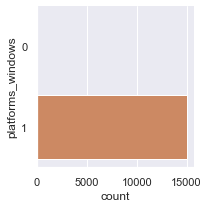

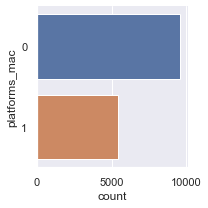

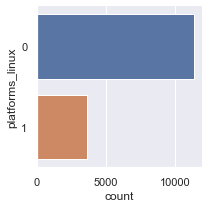

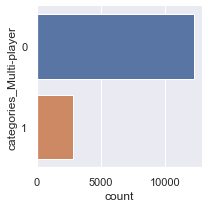

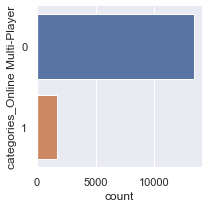

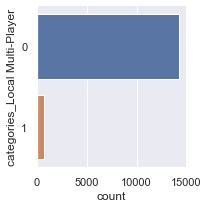

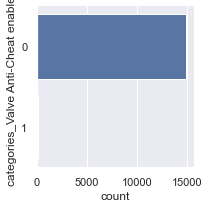

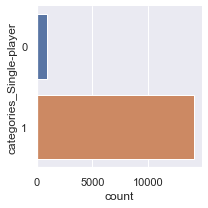

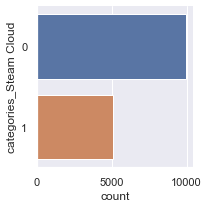

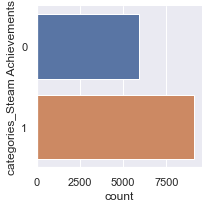

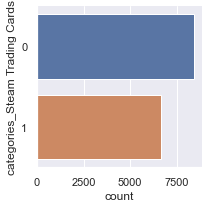

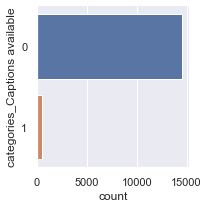

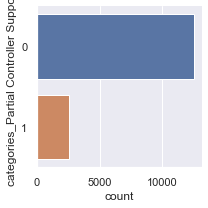

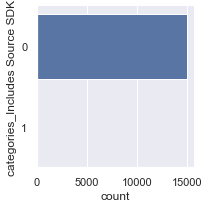

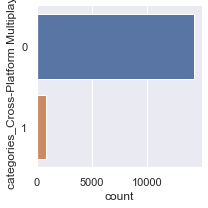

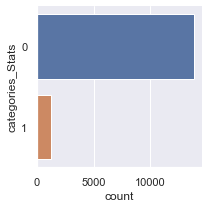

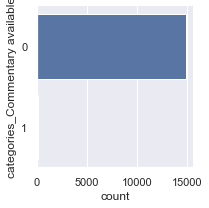

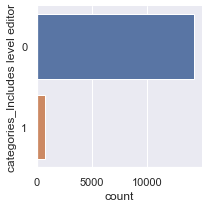

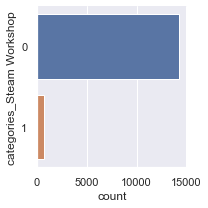

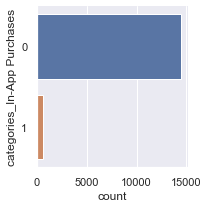

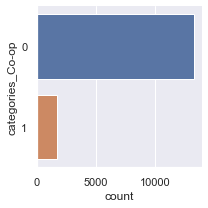

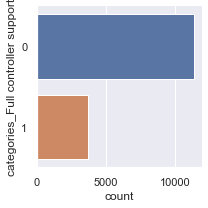

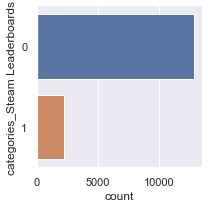

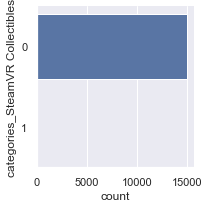

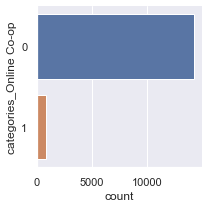

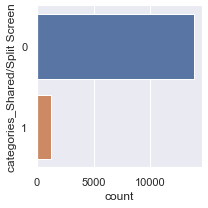

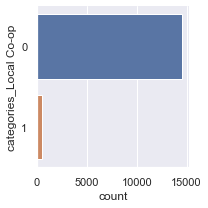

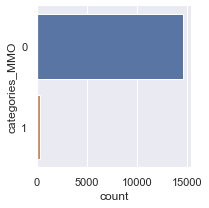

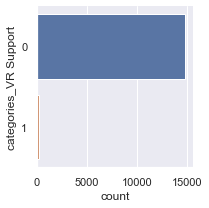

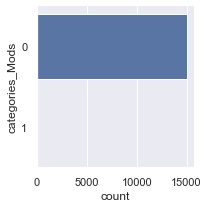

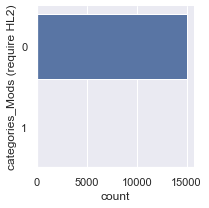

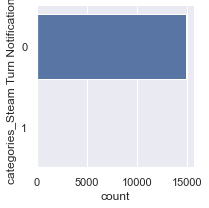

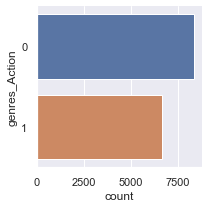

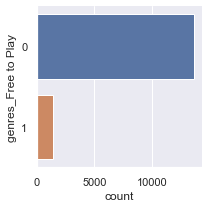

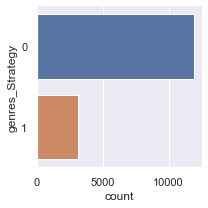

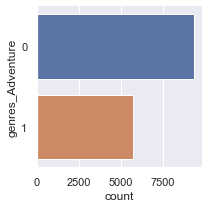

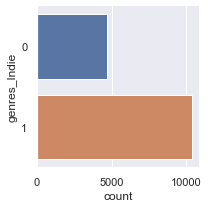

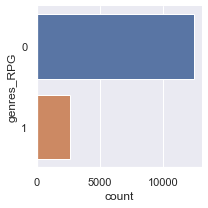

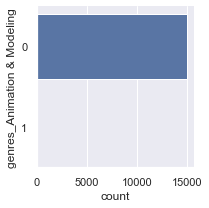

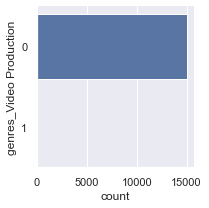

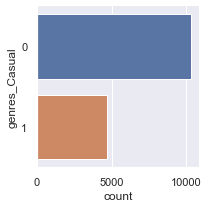

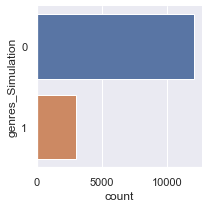

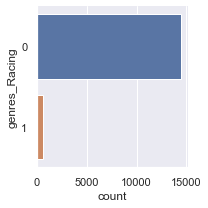

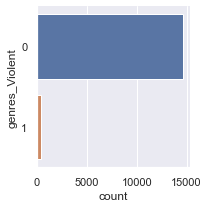

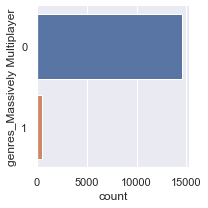

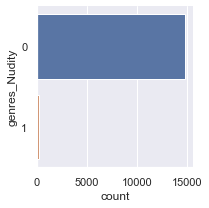

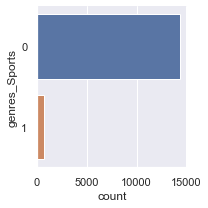

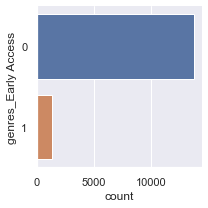

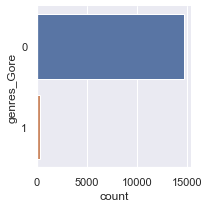

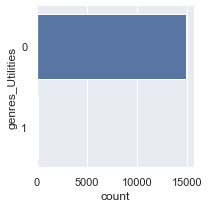

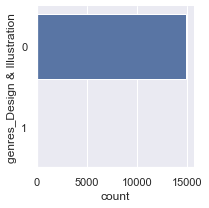

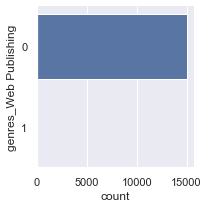

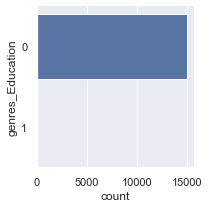

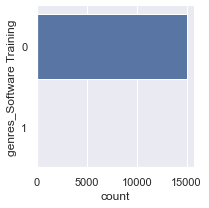

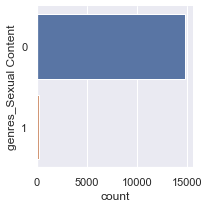

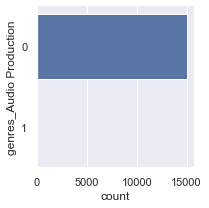

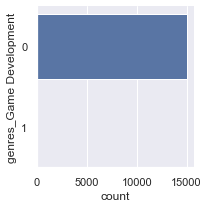

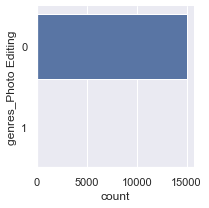

In [26]:
for var in dataCat:
    sb.catplot(y = var, data = dataCat, kind = "count", height = 3)
    dataCat[var].value_counts()

In [27]:
for var in dataCat:
    print(dataCat[var].value_counts(normalize=True), "\n")

1    0.999801
0    0.000199
Name: platforms_windows, dtype: float64 

0    0.638298
1    0.361702
Name: platforms_mac, dtype: float64 

0    0.757181
1    0.242819
Name: platforms_linux, dtype: float64 

0    0.811636
1    0.188364
Name: categories_Multi-player, dtype: float64 

0    0.888564
1    0.111436
Name: categories_Online Multi-Player, dtype: float64 

0    0.95
1    0.05
Name: categories_Local Multi-Player, dtype: float64 

0    0.993816
1    0.006184
Name: categories_Valve Anti-Cheat enabled, dtype: float64 

1    0.941556
0    0.058444
Name: categories_Single-player, dtype: float64 

0    0.660971
1    0.339029
Name: categories_Steam Cloud, dtype: float64 

1    0.60492
0    0.39508
Name: categories_Steam Achievements, dtype: float64 

0    0.559109
1    0.440891
Name: categories_Steam Trading Cards, dtype: float64 

0    0.96629
1    0.03371
Name: categories_Captions available, dtype: float64 

0    0.831782
1    0.168218
Name: categories_Partial Controller Support, dtype: 

Some categories have almost all games in either 0 (game is in that category) or 1 (game is not in that category). Extract only the variables that have notable distribution (at most 0.95:0.5 split). Some categories are subsets of other categories. Drop them from the DataFrame.

In [28]:
dataCat = pd.DataFrame(dataCat[['platforms_mac', 'platforms_linux', 'categories_Multi-player', 'categories_Single-player', 
                                'categories_Steam Cloud', 'categories_Steam Achievements', 'categories_Steam Trading Cards',
                                'categories_Partial Controller Support', 'categories_Stats', 'categories_Includes level editor',
                                'categories_Co-op', 'categories_Full controller support', 'categories_Steam Leaderboards', 
                                'genres_Action', 'genres_Free to Play', 'genres_Strategy', 'genres_Adventure', 'genres_Indie', 
                                'genres_RPG', 'genres_Casual', 'genres_Simulation', 'genres_Sports', 'genres_Early Access']])
dataCat

,platforms_mac,platforms_linux,categories_Multi-player,categories_Single-player,categories_Steam Cloud,categories_Steam Achievements,categories_Steam Trading Cards,categories_Partial Controller Support,categories_Stats,categories_Includes level editor,...,genres_Action,genres_Free to Play,genres_Strategy,genres_Adventure,genres_Indie,genres_RPG,genres_Casual,genres_Simulation,genres_Sports,genres_Early Access
0,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15035,0,0,0,1,0,1,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
15036,0,0,0,1,1,1,0,0,0,0,...,1,1,0,1,1,0,0,0,0,0
15037,0,0,0,1,0,0,0,1,0,0,...,0,1,1,1,1,1,0,0,0,0
15038,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [29]:
# Add price to the dataframe
dataCat = pd.concat([dataCat, dataNum_outliersremoved['price']], axis = 1).reindex(dataCat.index)
dataCat.head()

,platforms_mac,platforms_linux,categories_Multi-player,categories_Single-player,categories_Steam Cloud,categories_Steam Achievements,categories_Steam Trading Cards,categories_Partial Controller Support,categories_Stats,categories_Includes level editor,...,genres_Free to Play,genres_Strategy,genres_Adventure,genres_Indie,genres_RPG,genres_Casual,genres_Simulation,genres_Sports,genres_Early Access,price
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.19
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.99
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.99
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.99
4,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.99


Check the distribution of `price` across the 23 different categories using box-plots.

C:\Users\Jolene\AppData\Local\Temp\ipykernel_14660\2480802188.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(8, 6))


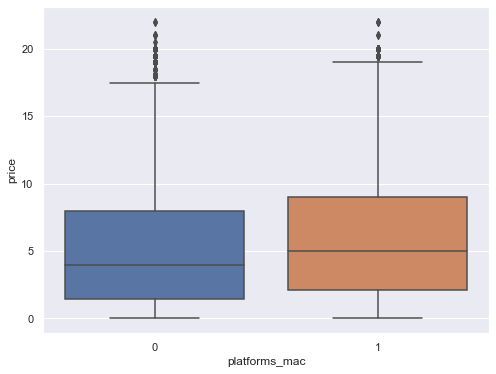

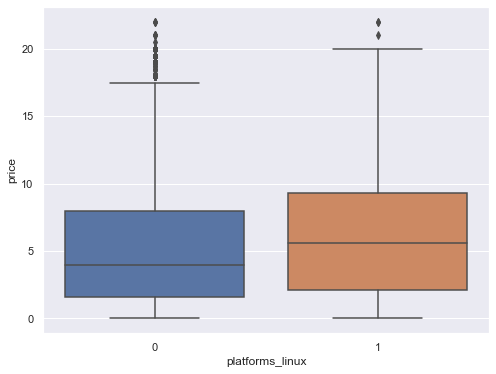

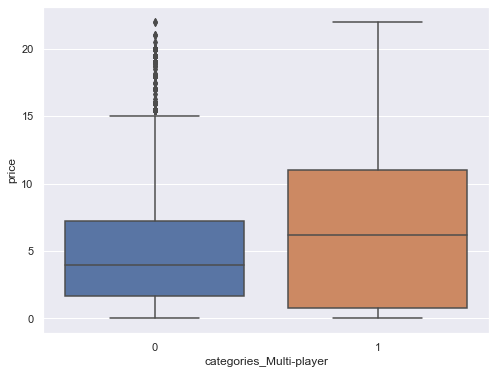

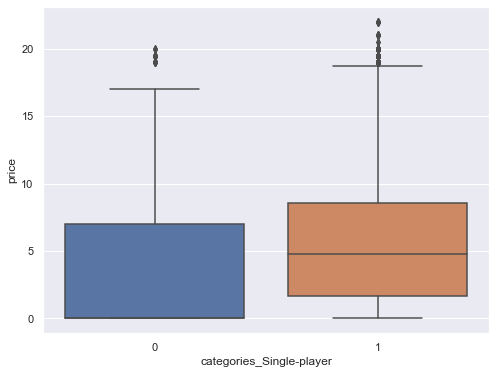

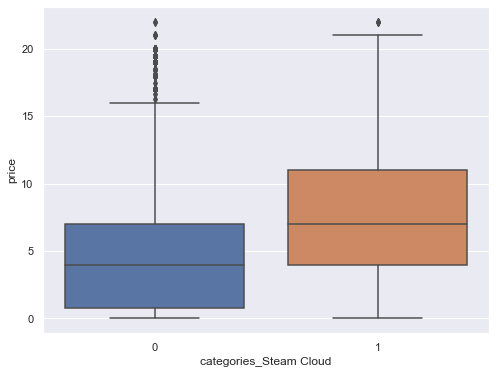

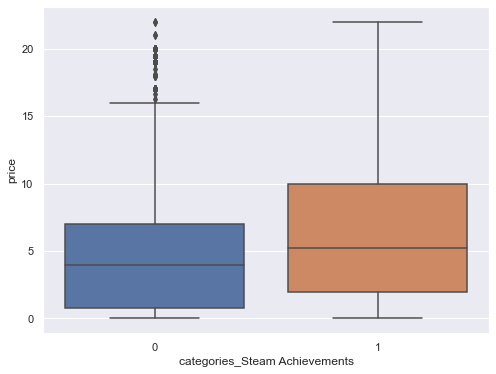

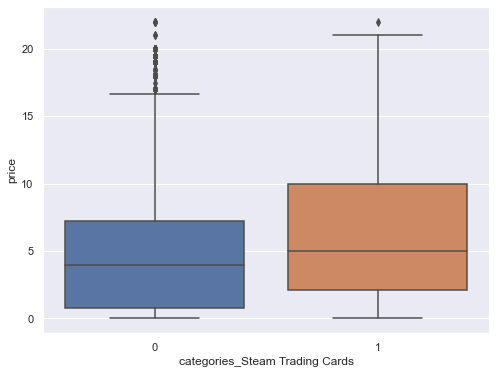

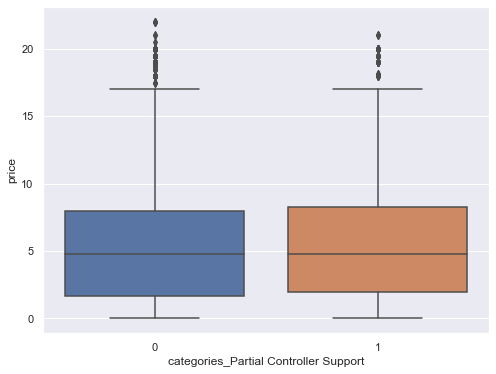

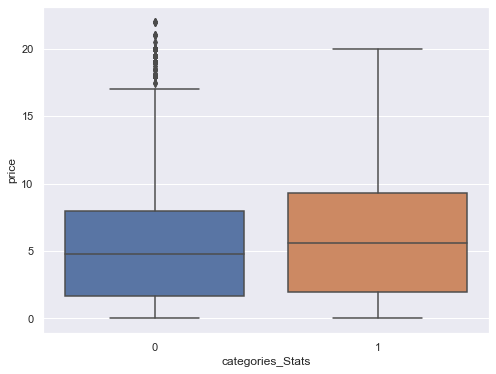

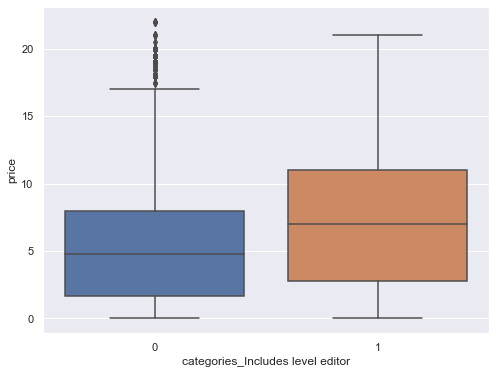

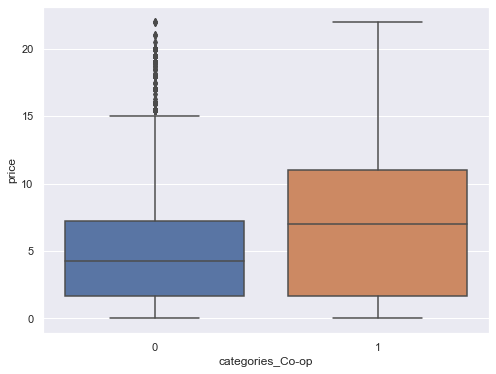

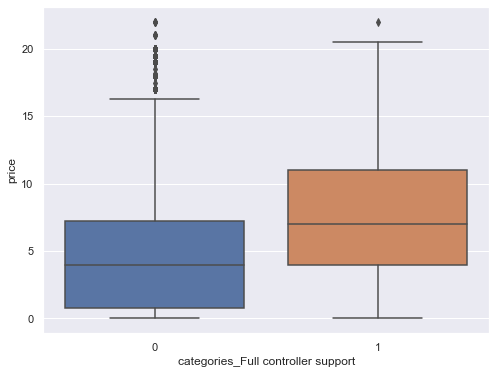

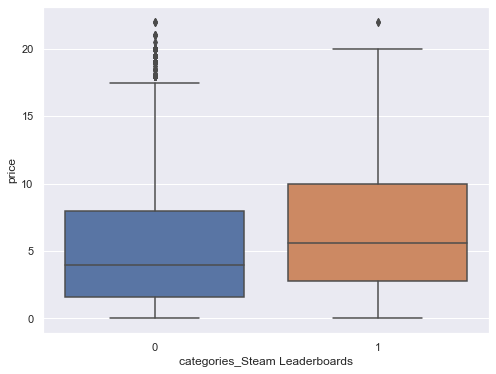

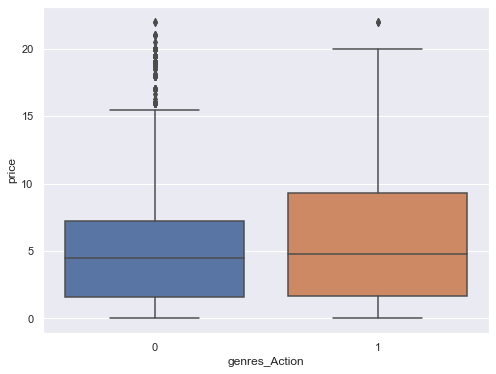

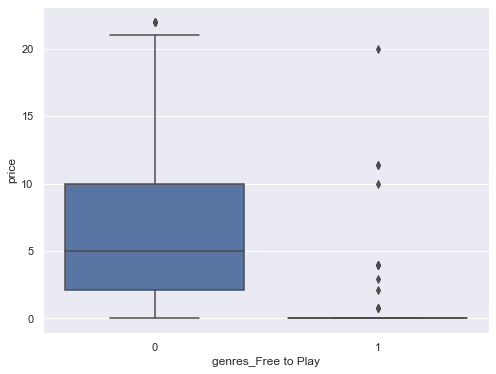

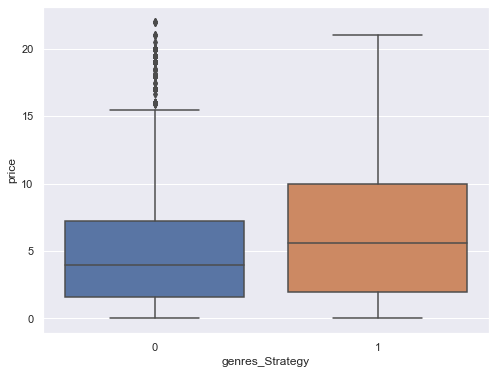

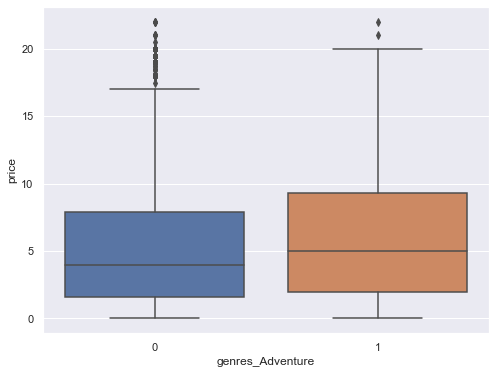

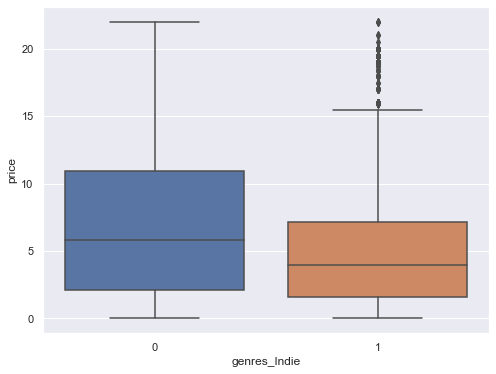

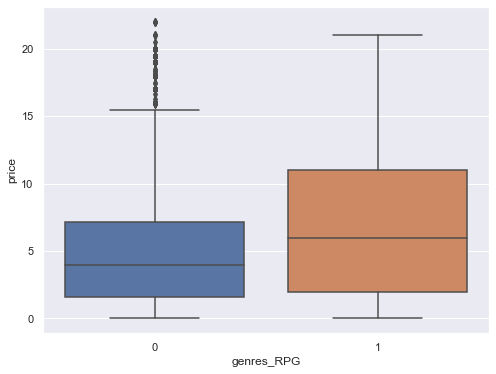

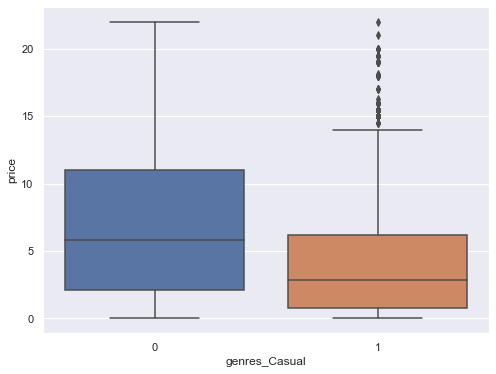

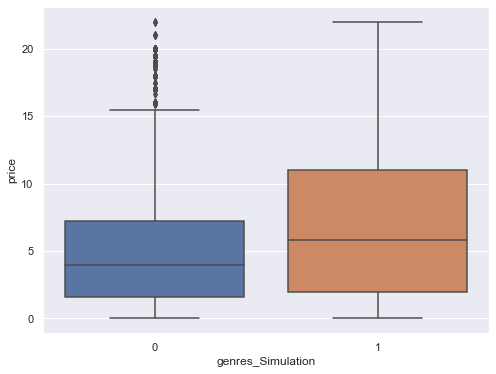

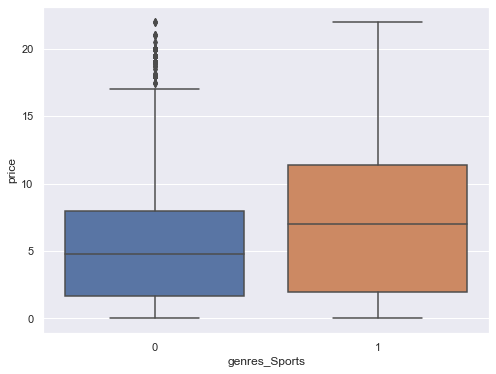

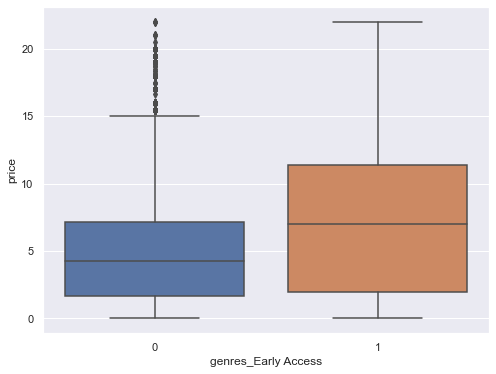

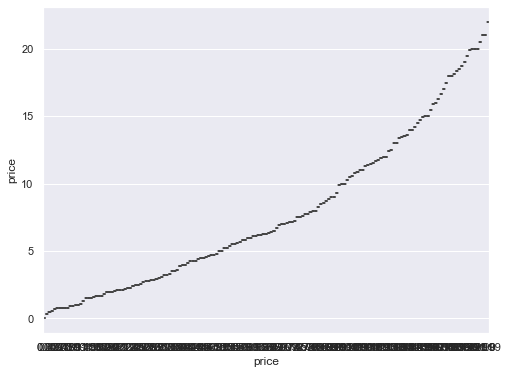

In [30]:
for var in dataCat:
    # Box-plot of price against each of the other variables
    f = plt.figure(figsize=(8, 6))
    sb.boxplot(x = var, y = 'price', data = dataCat)

From the above boxplots:
- Games that are available on Mac or Linux are generally more expensive, perhaps due to additional cost of making the game compatible with a different operating system.
- `Multi-player` games are generally more expensive than `Single-player` games.
- Games that support `Steam Cloud`, `Steam Achievements`, `Steam Trading Cards`, `Steam Leaderboards`, `Includes level editor`, and has `Full controller support` are generally more expensive.
- Across genres, whether it is an `Action` game does not significantly affect its price. `Strategy`, `Adventure`, `RPG`, `Simulation`, `Sports` and `Early Access` games are generally more expensive. `Casual` games are generally cheaper. `Indie` games are genrally cheaper possibly because independent developers have lower budget compared to larger companies. `Free to play` games are free, as expected.